In [8]:
import pandas as pd
import seaborn as sns

## Загрузка файла в pandas dataframe

In [3]:
df = pd.read_csv('HR.csv', sep=',')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Рассчет основных показателей среднее,медиана,мин/макс,сред.отклонение

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Мода

In [62]:
df_new = df[['satisfaction_level', 'last_evaluation' , 'number_project', 'average_montly_hours' , 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']]

In [94]:
def moda(number_moda,p):
    weight_counts = {}
    for w in number_moda.round():
        if w not in weight_counts:
            weight_counts[w] = 1
        else:
            weight_counts[w] += 1

    # Проходимся по словарю и ищем максимальное количество повторений
    # Алгоритм поиска максимума
    maxw = 0
    mode_weight = None
    for k, v in weight_counts.items():
        if maxw < v:
            maxw = v
            mode_weight = k
    return   print(f'Параметр: {p} Значение моды: { mode_weight} Количество встречаемости: {maxw} ')
    

In [134]:

for i in df_new:
    moda(df_new[i],i)


Параметр: satisfaction_level Значение моды: 1.0 Количество встречаемости: 10187 
Параметр: last_evaluation Значение моды: 1.0 Количество встречаемости: 13078 
Параметр: number_project Значение моды: 4 Количество встречаемости: 4365 
Параметр: average_montly_hours Значение моды: 135 Количество встречаемости: 153 
Параметр: time_spend_company Значение моды: 3 Количество встречаемости: 6443 
Параметр: Work_accident Значение моды: 0 Количество встречаемости: 12830 
Параметр: left Значение моды: 0 Количество встречаемости: 11428 
Параметр: promotion_last_5years Значение моды: 0 Количество встречаемости: 14680 


## Корреляционная матрица

In [7]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


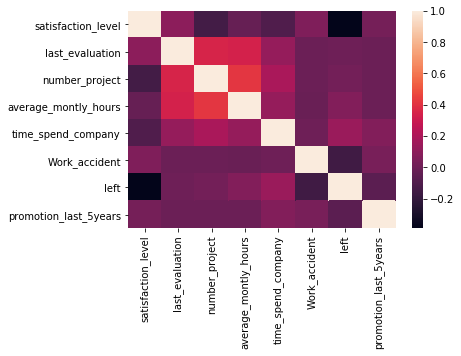

In [9]:
sns.heatmap(df.corr())

In [131]:
df_1 = df.corr()

k = 1 
kk = 1



p = 0 
pp = 0


for i in df_1.values:  
    for j in i: 
        if k > abs(j):
            kk = k
            k = abs(j)

        if (p < abs(j)) and ( abs(j) != 1 ):
            pp = p
            p = abs(j)

            
print(k, kk)
print(p, pp)

0.00212041809671425 0.003544414292995997
0.4172106344017606 0.3883749834240633


In [110]:
df_1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


## Менее скорелированные параметры:   
Work_accident - time_spend_company <br>
promotion_last_5years	- average_montly_hours

## Более скорелированные параметры:   
average_montly_hours - number_project <br>
eft	- satisfaction_level

## Сотрудники по отделам

In [19]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

## Сотрудники по зарплатам

In [20]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

## Сотрудники по зарплатам в отделах

In [32]:
df.groupby(['department', 'salary']).count().head(100)

satisfaction_level  last_evaluation  number_project  \
department  salary                                                        
IT          high                    83               83              83   
            low                    609              609             609   
            medium                 535              535             535   
RandD       high                    51               51              51   
            low                    364              364             364   
            medium                 372              372             372   
accounting  high                    74               74              74   
            low                    358              358             358   
            medium                 335              335             335   
hr          high                    45               45              45   
            low                    335              335             335   
            medium                 359              359             359   
management  high                   225              225             225   
            low                    180              180             180   
            medium                 225              225             225   
marketing   high                    80               80              80   
            low                    402              402             402   
            medium                 376              376             376   
product_mng high                    68               68              68   
            low                    451              451             451   
            medium                 383              383             383   
sales       high                   269              269             269   
            low                   2099             2099            2099   
            medium                1772             1772            1772   
support     high                   141              141             141   
            low                   1146             1146            1146   
            medium                 942              942             942   
technical   high                   201              201             201   
            low                   1372             1372            1372   
            medium                1147             1147            1147   

                    average_montly_hours  time_spend_company  Work_accident  \
department  salary                                                            
IT          high                      83                  83             83   
            low                      609                 609            609   
            medium                   535                 535            535   
RandD       high                      51                  51             51   
            low                      364                 364            364   
            medium                   372                 372            372   
accounting  high                      74                  74             74   
            low                      358                 358            358   
            medium                   335                 335            335   
hr          high                      45                  45             45   
            low                      335                 335            335   
            medium                   359                 359            359   
management  high                     225                 225            225   
            low                      180                 180            180   
            medium                   225                 225            225   
marketing   high                      80                  80             80   
            low                      402                 402            402   
            medium                   376                 376            376   
product_mng high                      6

## Проверка гипотезы, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низкимокладом

In [183]:
import matplotlib.pyplot as plt


In [308]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

In [191]:
df.groupby(['salary']).agg({'average_montly_hours': ['mean', 'median', lambda x: x.mode()]})

average_montly_hours                  
                       mean median <lambda_0>
salary                                       
high             199.867421    199        180
low              200.996583    199        135
medium           201.338349    201        156

In [307]:
df.groupby(['salary', 'average_montly_hours']).agg({'average_montly_hours': 'count'}).iloc[75:85,:].head()

average_montly_hours
salary average_montly_hours                      
high   178                                      9
       179                                      9
       180                                     16
       181                                      5
       182                                      6

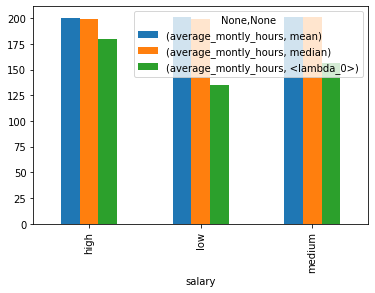

In [189]:
df.groupby(['salary']).agg({'average_montly_hours': ['mean', 'median', lambda x: x.mode()]}).plot(kind='bar')

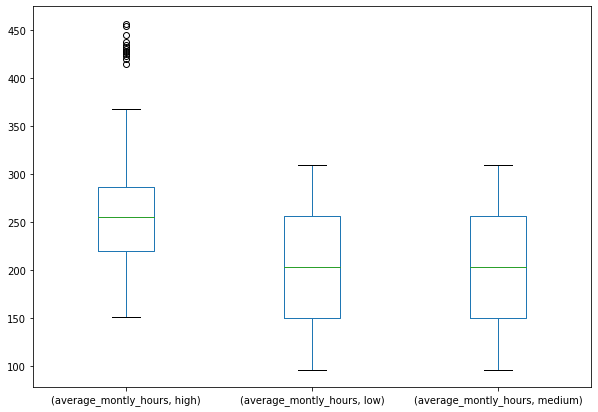

In [309]:
df[['average_montly_hours','salary']].groupby(['salary','average_montly_hours']).count().reset_index(
                                    ).assign(idx=df.groupby('salary').cumcount()).pivot_table(index='idx', columns='salary', 
                               aggfunc='sum').plot(kind='box')

## Выводы: те кто получает выше среднего работают больше, но те кто получают среднюю и маленькую ЗП работают примерно одинаково

## Доля сотрудников с повышением за последние 5 лет

In [369]:
#Уволенные
df[(df['left'] == 1)].groupby(['promotion_last_5years'])['left'].count() / len(df[(df['left'] == 1)]) * 100

promotion_last_5years
0    99.467936
1     0.532064
Name: left, dtype: float64

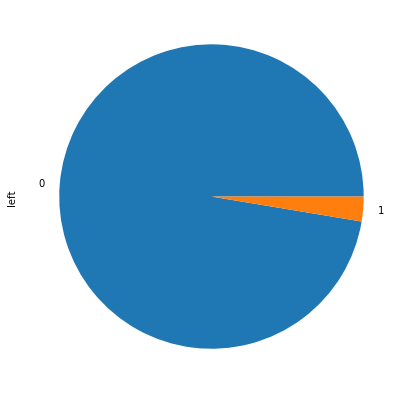

In [370]:
#Сотрудники
df[(df['left'] == 0)].groupby(['promotion_last_5years'])['left'].count().plot(kind='pie', y='Count')

In [350]:
df[(df['left'] == 0)].groupby(['promotion_last_5years'])['left'].count() / len(df[(df['left'] == 0)]) * 100

promotion_last_5years
0    97.374869
1     2.625131
Name: left, dtype: float64

## Средняя степень удовлетворенности

In [368]:
#Уволенные
df[(df['left'] == 1)]['satisfaction_level'].mean()

0.44009801176140917

In [371]:
#Сотрудники
df[(df['left'] == 0)]['satisfaction_level'].mean()

0.666809590479516

## Среднее количество проектов

In [373]:
#Уволенные
df[(df['left'] == 1)]['number_project'].mean()

3.8555026603192384

In [374]:
#Сотрудники
df[(df['left'] == 0)]['number_project'].mean()

3.786664333216661

## Построение модели LDA

In [461]:
df_lda = df[['satisfaction_level', 'last_evaluation' , 'number_project', 'average_montly_hours' , 'time_spend_company', 'Work_accident', 'promotion_last_5years']]

df_left = df['left']

In [462]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_lda, df_left, test_size=0.10)


In [463]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [464]:
lda = LinearDiscriminantAnalysis()


In [465]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [467]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result.head(50)

,left,Unnamed 0
14403,1.0,NaN
1931,1.0,NaN
8132,0.0,NaN
5438,0.0,NaN
315,1.0,1.0
9910,0.0,NaN
1,1.0,0.0
95,1.0,0.0
2584,0.0,NaN
14645,1.0,NaN


In [468]:
from sklearn.metrics import accuracy_score

In [469]:
accuracy_score(y_test, lda.predict(X_test))

0.746

In [460]:
lda.coef_

array([[-4.51526522e+00,  6.20904655e-01, -2.32080575e-01,
         4.47459242e-03,  2.28624621e-01, -1.08198956e+00,
        -1.00857009e+00]])

## Модель не очень качественная, т.к. довольно часто ошибается и/или не может сделать прогноз.  Но учитывая, что данные дополнительно не обрабатывались, что результат считаю приемлемый. 

In [471]:
df_lda_v2 = df[['satisfaction_level', 'last_evaluation' , 'number_project', 'average_montly_hours' , 'time_spend_company']]

df_left = df['left']

In [472]:
X_train, X_test, y_train, y_test = train_test_split(df_lda, df_left, test_size=0.10)

In [473]:
lda_v2 = LinearDiscriminantAnalysis()
lda_v2.fit(X_train, y_train)
result = pd.DataFrame([y_test, lda_v2.predict(X_test)]).T
accuracy_score(y_test, lda.predict(X_test))

0.7813333333333333